In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination 
# using citipy module
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [87]:
#Init the lists
name=[]
lat=[]
max_temp=[]
lng=[]
humidity=[]
cloud=[]
wind_speed=[]
country=[]
date=[]
weather_data={}
#Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d178fb16918d814296102796efe8a578&units=imperial&q=


In [88]:
for city in cities : 
    try:
        response=requests.get(query_url + city).json()
        name.append(response['name']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        raw_date=response['dt']
        conv_date=time.strftime("%D %H:%M", time.localtime(int(raw_date)))
        date.append(conv_date)
        count = cities.index(city)
        cname = response['name']
        print(f'Processing Record {count}: {cname} {conv_date}')
    except KeyError :
        print(f'City {city} not found')

City belushya guba not found
Processing Record 1: Hailun 12/14/20 22:42
Processing Record 2: Port Hardy 12/14/20 22:42
Processing Record 3: Mataura 12/14/20 22:42
Processing Record 4: Sturgis 12/14/20 22:42
Processing Record 5: Aklavik 12/14/20 22:42
Processing Record 6: Mar del Plata 12/14/20 22:34
Processing Record 7: Ilulissat 12/14/20 22:39
Processing Record 8: New Norfolk 12/14/20 22:42
Processing Record 9: Nikolskoye 12/14/20 22:42
Processing Record 10: Nemuro 12/14/20 22:42
Processing Record 11: Sanming 12/14/20 22:42
Processing Record 12: Hilo 12/14/20 22:42
Processing Record 13: Lazo 12/14/20 22:42
Processing Record 14: Mahébourg 12/14/20 22:34
Processing Record 15: Ribeira Grande 12/14/20 22:34
Processing Record 16: Booué 12/14/20 22:42
Processing Record 17: Albany 12/14/20 22:35
Processing Record 18: Bluff 12/14/20 22:42
Processing Record 19: Zyryanka 12/14/20 22:42
Processing Record 20: Nhulunbuy 12/14/20 22:42
Processing Record 21: Vaini 12/14/20 22:42
Processing Record 22

Processing Record 185: Kaitangata 12/14/20 22:42
Processing Record 186: Saldanha 12/14/20 22:42
Processing Record 187: Portland 12/14/20 22:39
Processing Record 188: Toruń 12/14/20 22:42
Processing Record 189: Umm Hājar 12/14/20 22:42
Processing Record 190: Raudeberg 12/14/20 22:42
Processing Record 191: Clyde River 12/14/20 22:39
Processing Record 192: Palmer 12/14/20 22:39
Processing Record 193: Umm Kaddadah 12/14/20 22:42
Processing Record 194: Sørland 12/14/20 22:42
Processing Record 195: Scottsbluff 12/14/20 22:38
Processing Record 196: Senno 12/14/20 22:42
City grand river south east not found
Processing Record 198: Pitimbu 12/14/20 22:42
Processing Record 199: Belaya Gora 12/14/20 22:42
Processing Record 200: Safi 12/14/20 22:42
City umm durman not found
Processing Record 202: Teahupoo 12/14/20 22:42
City artyk not found
Processing Record 204: Souillac 12/14/20 22:42
Processing Record 205: Ponta do Sol 12/14/20 22:42
Processing Record 206: Klaksvík 12/14/20 22:42
Processing Reco

Processing Record 364: Şabyā 12/14/20 22:42
Processing Record 365: Maykor 12/14/20 22:42
Processing Record 366: Balsas 12/14/20 22:40
Processing Record 367: Sirte 12/14/20 22:40
Processing Record 368: Impfondo 12/14/20 22:42
Processing Record 369: Cayenne 12/14/20 22:42
Processing Record 370: Sambava 12/14/20 22:42
Processing Record 371: Kānkon 12/14/20 22:42
Processing Record 372: Gorzów Wielkopolski 12/14/20 22:41
Processing Record 373: Guilin 12/14/20 22:42
Processing Record 374: Deputatsky 12/14/20 22:42
Processing Record 375: Doctor Arroyo 12/14/20 22:42
Processing Record 376: Faanui 12/14/20 22:42
Processing Record 377: Arrondissement de Dreux 12/14/20 22:42
Processing Record 378: Shingū 12/14/20 22:42
Processing Record 379: Kiunga 12/14/20 22:34
Processing Record 380: Iperó 12/14/20 22:42
Processing Record 381: Columbus 12/14/20 22:41
Processing Record 382: Pasni 12/14/20 22:42
Processing Record 383: Verāval 12/14/20 22:42
Processing Record 384: Madimba 12/14/20 22:42
Processing

Processing Record 546: Puerto Escondido 12/14/20 22:42
Processing Record 547: Alice Springs 12/14/20 22:42
City el balyana not found
Processing Record 549: Gizo Government Station 12/14/20 22:42
Processing Record 550: Lakefield 12/14/20 22:42
Processing Record 551: Palana 12/14/20 22:42
Processing Record 552: Meulaboh 12/14/20 22:42
Processing Record 553: Morant Bay 12/14/20 22:42
Processing Record 554: Coyhaique 12/14/20 22:42
Processing Record 555: Esmeralda 12/14/20 22:42
Processing Record 556: Cabra 12/14/20 22:42
Processing Record 557: Dourados 12/14/20 22:42
City saleaula not found
Processing Record 559: Chachapoyas 12/14/20 22:42
Processing Record 560: Kibala 12/14/20 22:42
Processing Record 561: Constantine 12/14/20 22:42
Processing Record 562: Yankton 12/14/20 22:42
Processing Record 563: Bolobo 12/14/20 22:42
Processing Record 564: Sovetskoye 12/14/20 22:42
Processing Record 565: Ostrovnoy 12/14/20 22:42
Processing Record 566: Paita 12/14/20 22:42
Processing Record 567: Snyde

In [89]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng" : lng,
    "Max temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloud,
    "Wind speed" : wind_speed, 
    "Country" : country,
    "Date" : date
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Hailun,47.45,126.93,-3.32,81,0,8.34,CN,12/14/20 22:42
1,Port Hardy,50.70,-127.42,44.60,87,90,19.46,CA,12/14/20 22:42
2,Mataura,-46.19,168.86,63.00,71,0,14.00,NZ,12/14/20 22:42
3,Sturgis,41.80,-85.42,24.80,73,1,5.95,US,12/14/20 22:42
4,Aklavik,68.22,-135.01,-18.40,75,48,2.24,CA,12/14/20 22:42


In [93]:
weather_data=pd.read_csv(output_data_file)
weather_data.head()

,Unnamed: 0,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,0,Hailun,47.45,126.93,-3.32,81,0,8.34,CN,12/14/20 22:42
1,1,Port Hardy,50.70,-127.42,44.60,87,90,19.46,CA,12/14/20 22:42
2,2,Mataura,-46.19,168.86,63.00,71,0,14.00,NZ,12/14/20 22:42
3,3,Sturgis,41.80,-85.42,24.80,73,1,5.95,US,12/14/20 22:42
4,4,Aklavik,68.22,-135.01,-18.40,75,48,2.24,CA,12/14/20 22:42


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [94]:
#  Get the indices of cities that have humidity over 100%.
humid= (weather_data['Humidity'] > 100)
humid_cities=weather_data[humid]



In [95]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

print(f'There are {len(humid_cities)} cities with humidity > 100%')

There are 0 cities with humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

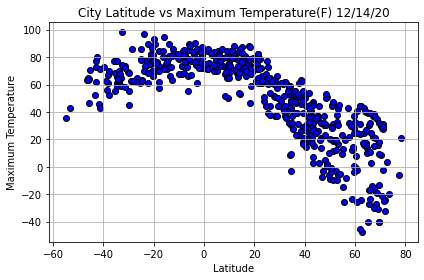

In [105]:
x_val=weather_data["Lat"]
y_val=weather_data["Max temp"]
mdate=weather_data["Date"][0][0:8]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Maximum Temperature(F) {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig1")
                      


## Latitude vs. Humidity Plot

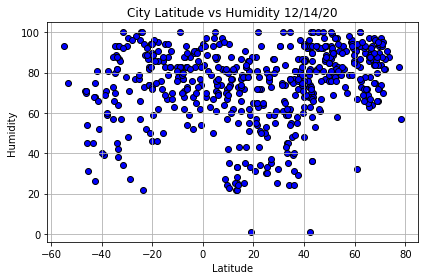

In [106]:
x_val=weather_data["Lat"]
y_val=weather_data["Humidity"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Humidity {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig2")

## Latitude vs. Cloudiness Plot

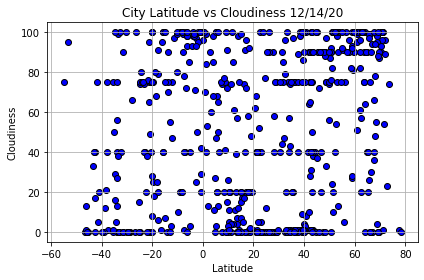

In [107]:
x_val=weather_data["Lat"]
y_val=weather_data["Cloudiness"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Cloudiness {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig3")

## Latitude vs. Wind Speed Plot

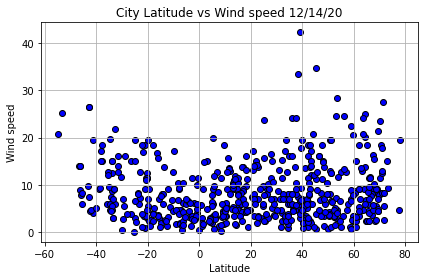

In [108]:
x_val=weather_data["Lat"]
y_val=weather_data["Wind speed"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title(f"City Latitude vs Wind speed {mdate}")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.tight_layout()
plt.grid()
plt.savefig("../output_data/fig4")

## Linear Regression

In [16]:
northern= weather_data.loc[weather_data['Lat'] > 0]
southern= weather_data.loc[weather_data['Lat'] < 0]


186

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :-0.83
Linear equation for regression : y = -1.35x + 94.23 


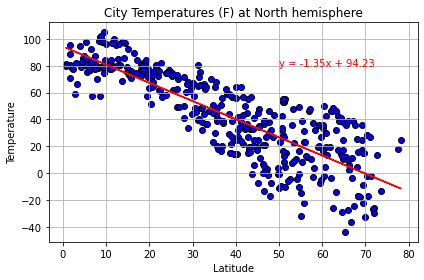

In [48]:
x_values=northern['Lat']
y_values=northern["Max temp"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * northern['Lat'] + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Temperatures (F) at North hemisphere")
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(linear_equ, (50, 80), fontsize=10, color='red')
plt.tight_layout()
plt.grid()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.62
Linear equation for regression : y = 0.47x + 84.89 


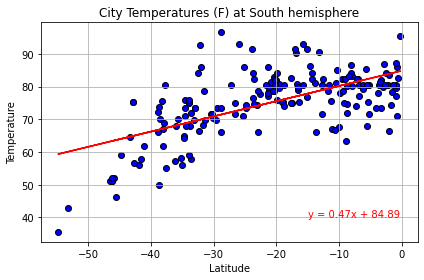

In [60]:
x_values=southern['Lat']
y_values=southern["Max temp"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * southern['Lat'] + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Temperatures (F) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(linear_equ, (-15, 40), fontsize=10, color='red')
plt.plot(x_values,r_val, "r-")
plt.tight_layout()
plt.grid()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.37
Linear equation for regression : y = 0.41x + 57.34 


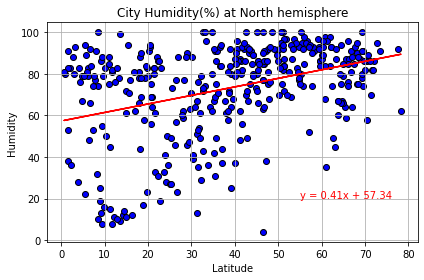

In [62]:
x_values=northern['Lat']
y_values=northern["Humidity"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Humidity(%) at North hemisphere")
plt.annotate(linear_equ, (55, 20), fontsize=10, color='red')
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.17
Linear equation for regression : y = 0.25x + 75.53 


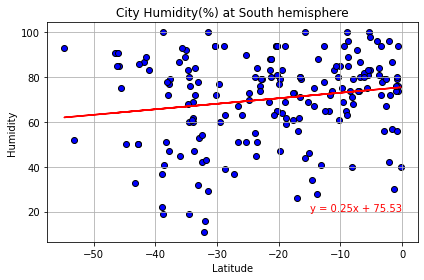

In [63]:
x_values=southern['Lat']
y_values=southern["Humidity"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Humidity(%) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values,r_val, "r-")
plt.annotate(linear_equ, (-15, 20), fontsize=10, color='red')
plt.tight_layout()
plt.grid()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.33
Linear equation for regression : y = 0.63x + 33.76 


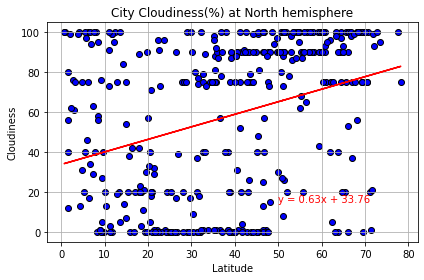

In [67]:
x_values=northern['Lat']
y_values=northern["Cloudiness"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Cloudiness(%) at North hemisphere")
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(linear_equ, (50, 15), fontsize=10, color='red')
plt.tight_layout()
plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.39
Linear equation for regression : y = 1.07x + 76.42 


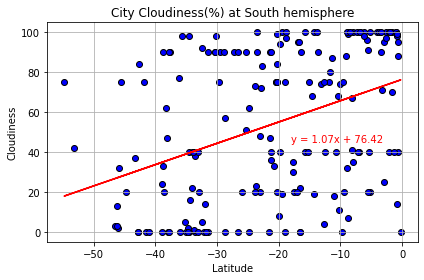

In [72]:
x_values=southern['Lat']
y_values=southern["Cloudiness"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Cloudiness(%) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values,r_val, "r-")
plt.annotate(linear_equ, (-18, 45), fontsize=10, color='red')
plt.tight_layout()
plt.grid()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :0.2
Linear equation for regression : y = 0.07x + 6.1 


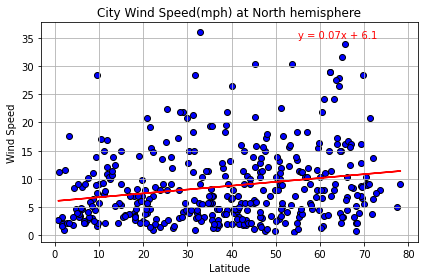

In [73]:
x_values=northern['Lat']
y_values=northern["Wind speed"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Wind Speed(mph) at North hemisphere")
plt.plot(x_values,r_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(linear_equ, (55, 35), fontsize=10, color='red')
plt.tight_layout()
plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :-0.25
Linear equation for regression : y = -0.13x + 6.37 


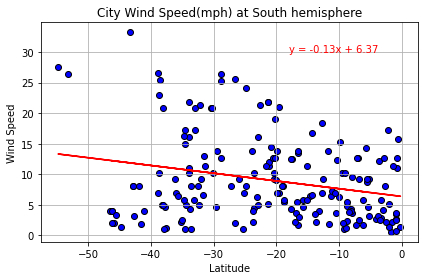

In [74]:
x_values=southern['Lat']
y_values=southern["Wind speed"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * x_values + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("City Wind Speed(mph) at South hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_values,r_val, "r-")
plt.annotate(linear_equ, (-18, 30), fontsize=10, color='red')
plt.tight_layout()
plt.grid()